# Feature Engineering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = pd.read_csv('../data/clean/df_cleaned.csv')

In [3]:
df_final = df_final.drop(columns=['Unnamed: 0'])
df_final = df_final.set_index('time')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other                 

In [4]:
df_final.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0


In [5]:
# Find the correlations between the actual load and the features

correlations = df_final.corr(method='pearson')
print(correlations['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
generation fossil gas                          0.548986
generation fossil oil                          0.496139
generation hydro water reservoir               0.479491
price day ahead                                0.474273
price actual                                   0.435253
generation fossil hard coal                    0.397079
generation solar                               0.395511
generation fossil brown coal/lignite           0.280735
temp_min_Valencia                              0.235297
temp_Valencia                                  0.220790
temp_min_Seville                               0.206488
temp_max_Madrid                                0.204718
temp_Seville                                   0.204571
temp_max_Valencia                              0.199833
temp_Bilbao                                    0.196535
temp_max_Bilbao                                0.194181
temp_min_Bilbao                                0

In [6]:
# Drop columns that give NaNs in their correlations with the electricity actual price.

df_final = df_final.drop(['snow_3h_Barcelona', 'snow_3h_Seville'], axis=1)

In [7]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['is_weekend'] = df.index.dayofweek >= 5
    return df

In [8]:
df_final.index = pd.to_datetime(df_final.index, utc=True)
df_final = create_features(df_final)

# Data Visualization

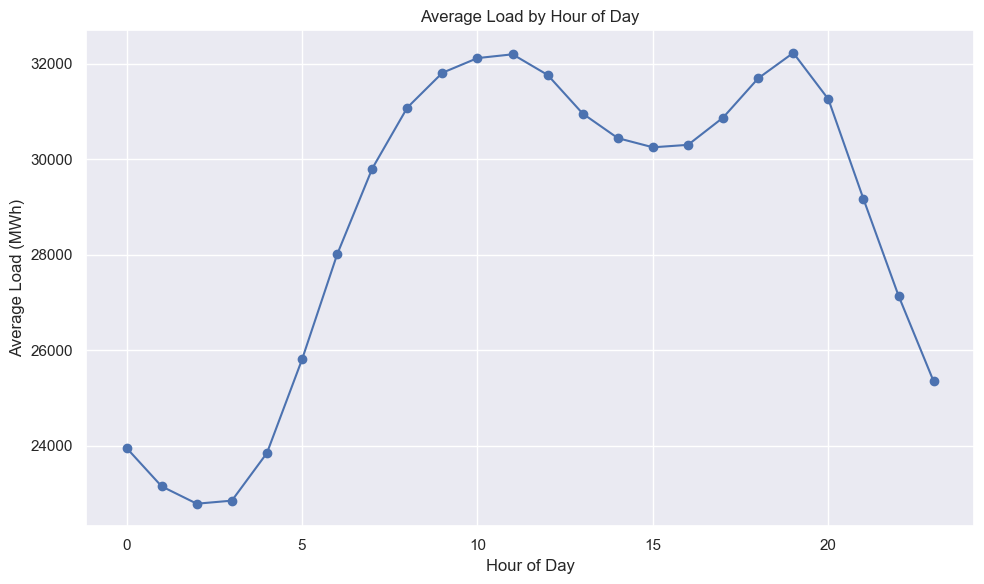

In [ ]:
# Group by hour and calculate the average load
hourly_avg = df_final.groupby(df_final.index.hour)['total load actual'].mean()
hourly_avg.plot(kind='line', marker='o', figsize=(10, 6), title='Average Load by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

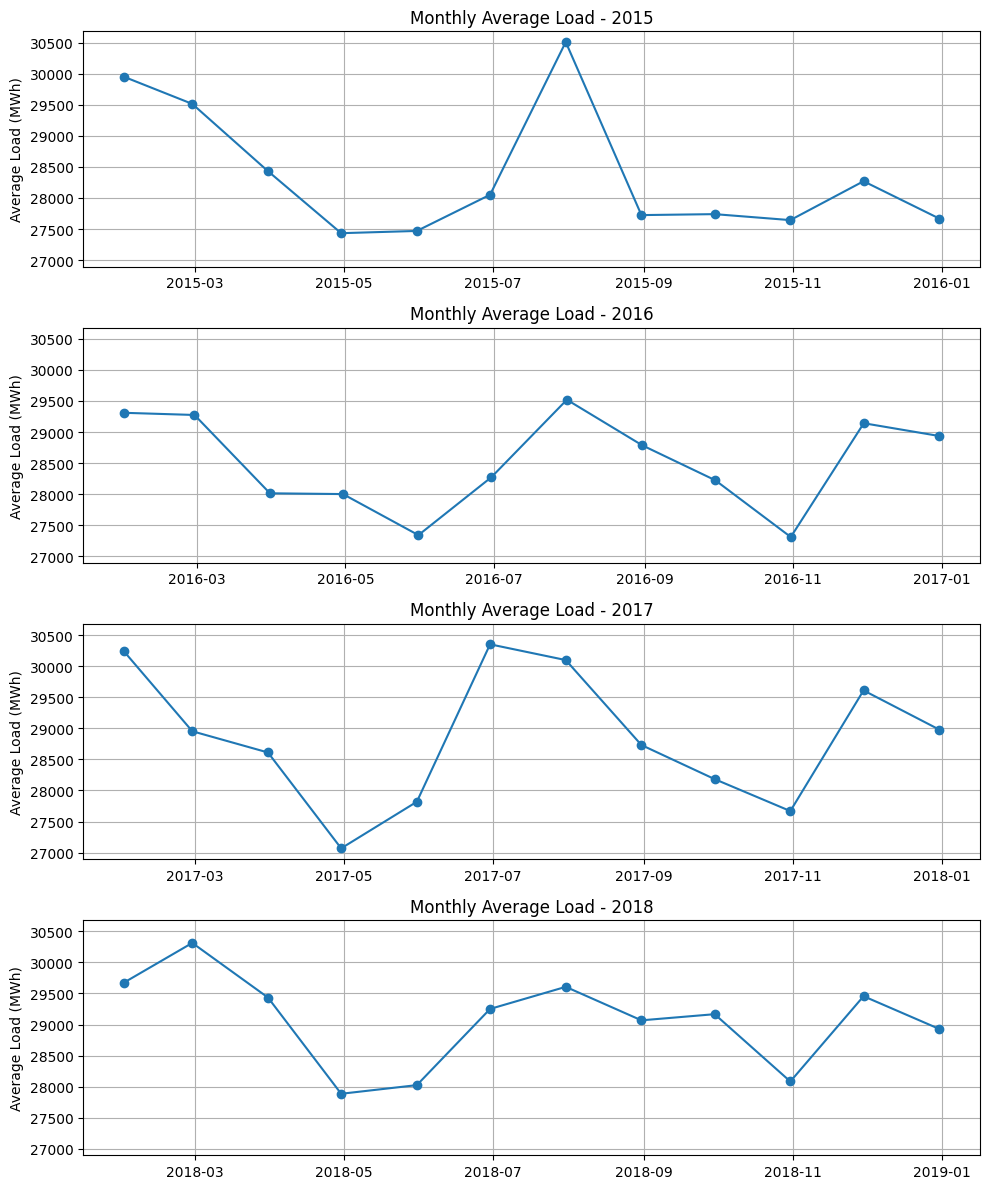

In [10]:
# Resample to monthly average
monthly_load = df_final['total load actual'].resample('ME').mean()

# Get list of years
monthly_load = monthly_load[monthly_load.index.year != 2014]
years = monthly_load.index.year.unique()

# Plot
fig, axs = plt.subplots(len(years), 1, figsize=(10, 12), sharey=True)

for i, year in enumerate(years):
    yearly_data = monthly_load[monthly_load.index.year == year]
    axs[i].plot(yearly_data.index, yearly_data.values, marker='o')
    axs[i].set_title(f'Monthly Average Load - {year}')
    axs[i].set_ylabel('Average Load (MWh)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

C:\Users\canil\AppData\Local\Temp\ipykernel_10076\1324535583.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)


Text(0.5, 1.0, 'Load Distribution by Day of Week')

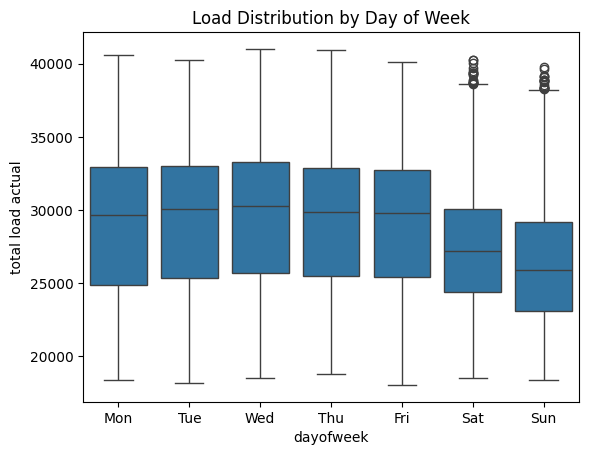

In [20]:
ax = sns.boxplot(data=df_final, x='dayofweek', y='total load actual')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.title('Load Distribution by Day of Week')

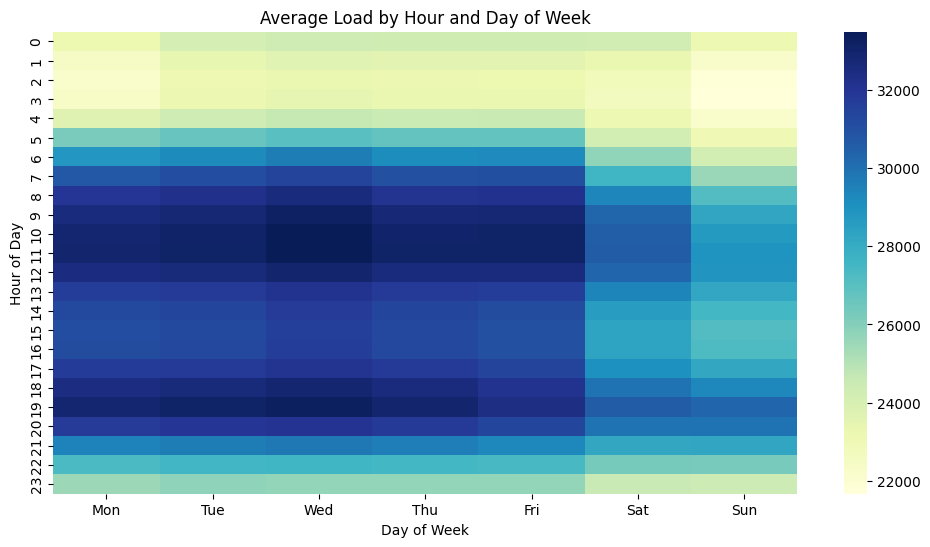

In [21]:
heatmap_data = df_final.pivot_table(
    values='total load actual',
    index='hour',
    columns='dayofweek',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.title('Average Load by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

In [22]:
df_final.to_csv('../data/prepared/df_prepared.csv')